In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/customembeddingtraining/Final Training Clean DL.csv


In [2]:
df = pd.read_csv('/kaggle/input/customembeddingtraining/Final Training Clean DL.csv')
df.head()

,Consumer complaint narrative,Total Clean Text
0,transworld systems inc. \nis trying to collect...,trans world systems inc be try to collect deb...
1,I would like to request the suppression of the...,would like to request the suppression of the ...
2,"Over the past 2 weeks, I have been receiving e...",over the past weeks have be receive excessiv...
3,"I was sold access to an event digitally, of wh...",be sell access to an event digitally of which...
4,While checking my credit report I noticed thre...,while check my credit report notice three col...


In [3]:
df.shape

(506162, 2)

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm
tqdm.pandas()

In [5]:
stop_words = list(set(stopwords.words('english')))+['unknown','xx','xxx','xxxx']

In [6]:
def cleaning(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['After Stop Word Removal'] = df['Total Clean Text'].progress_apply(cleaning)

100%|██████████| 506162/506162 [18:42<00:00, 450.89it/s]


In [7]:
df.to_csv('Consumer Complaint After Cleaning and Stop Words Removed.csv',index = False)

In [8]:
df.head()

,Consumer complaint narrative,Total Clean Text,After Stop Word Removal
0,transworld systems inc. \nis trying to collect...,trans world systems inc be try to collect deb...,trans world systems inc try collect debt mine ...
1,I would like to request the suppression of the...,would like to request the suppression of the ...,would like request suppression follow items cr...
2,"Over the past 2 weeks, I have been receiving e...",over the past weeks have be receive excessiv...,past weeks receive excessive amount telephone ...
3,"I was sold access to an event digitally, of wh...",be sell access to an event digitally of which...,sell access event digitally screenshots detail...
4,While checking my credit report I noticed thre...,while check my credit report notice three col...,check credit report notice three collections c...


In [9]:
text = df['After Stop Word Removal'].values
text = ' '.join(text)

In [10]:
type(text)

str

In [11]:
import re
from itertools import islice
from collections import Counter
words = re.findall("\w+", text)
#print (Counter(zip(words, islice(words, 1, None))))
x = (Counter(zip(words, islice(words, 1, None))))
D = dict(x)

In [12]:
import operator
sorted_x = sorted(D.items(), key=operator.itemgetter(1),reverse = True)

In [13]:
top_50 = dict(sorted_x[:50])
top_50

{('credit', 'report'): 286509,
 ('credit', 'card'): 104561,
 ('qui', 'fax'): 75355,
 ('ex', 'peri'): 54591,
 ('well', 'fargo'): 53949,
 ('credit', 'bureaus'): 50546,
 ('identity', 'theft'): 46972,
 ('trans', 'union'): 45732,
 ('credit', 'score'): 43663,
 ('customer', 'service'): 43305,
 ('fc', 'ra'): 40246,
 ('report', 'credit'): 37848,
 ('bank', 'america'): 37065,
 ('phone', 'call'): 35687,
 ('call', 'back'): 34711,
 ('check', 'account'): 33364,
 ('student', 'loan'): 33103,
 ('30', 'days'): 33018,
 ('navi', 'ent'): 31612,
 ('collection', 'agency'): 30294,
 ('would', 'like'): 29862,
 ('receive', 'letter'): 29462,
 ('credit', 'file'): 29284,
 ('make', 'payment'): 29145,
 ('capital', 'one'): 28296,
 ('make', 'payments'): 27740,
 ('close', 'account'): 27611,
 ('never', 'receive'): 27268,
 ('send', 'letter'): 27259,
 ('account', 'number'): 27200,
 ('report', 'agency'): 26822,
 ('remove', 'credit'): 26803,
 ('late', 'fee'): 26792,
 ('even', 'though'): 26166,
 ('past', 'due'): 25695,
 ('cons

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

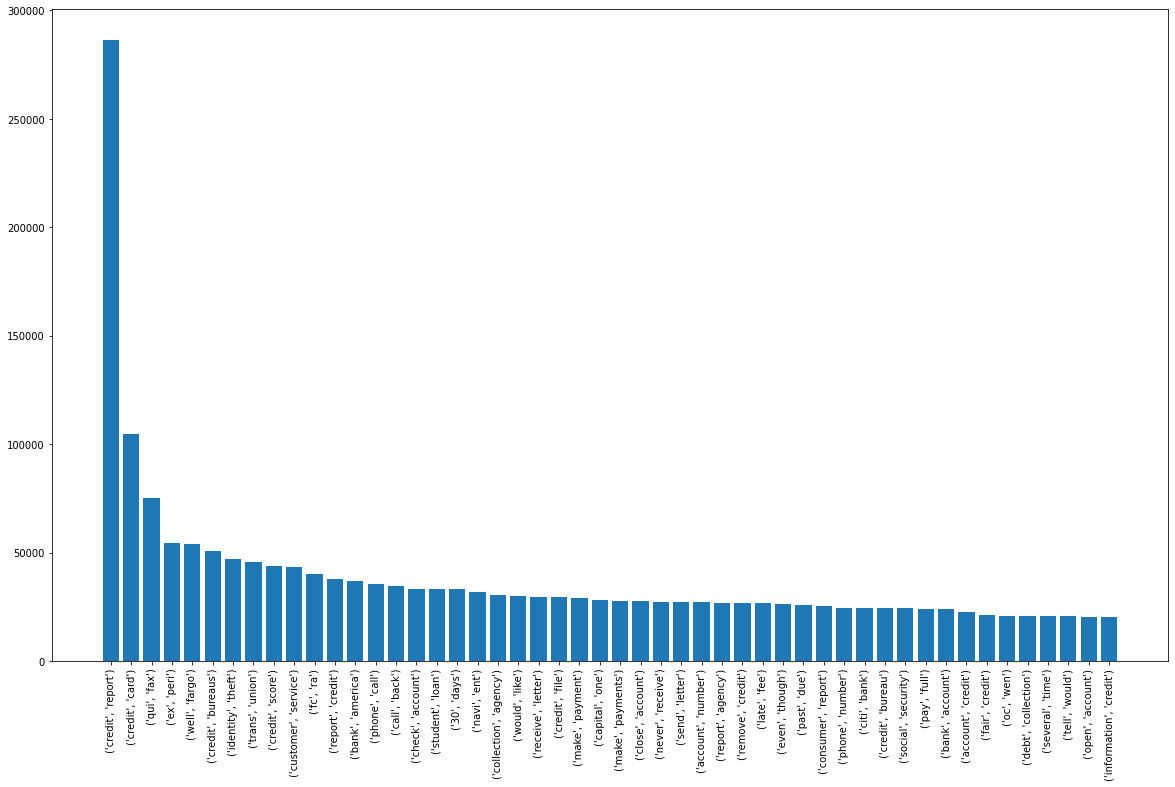

In [15]:
plt.figure(figsize= (20,12))
plt.bar(range(len(top_50)), list(top_50.values()), align='center')
plt.xticks(range(len(top_50)), list(top_50.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
#plt.figure(figsize= (20,12))
plt.xticks(rotation=90)
plt.show()

In [16]:
import re
from itertools import islice
from collections import Counter
words = re.findall("\w+", text)
from itertools import tee, islice

def ngrams(lst, n):
    
  tlst = lst
  while True:
    a, b = tee(tlst)
    l = tuple(islice(a, n))
    if len(l) == n:
      yield l
      next(b)
      tlst = b
    else:
      break
    

trigram = Counter(ngrams(words, 3))
#x = (Counter(zip(words, islice(words, 1, None))))
#D = dict(x)

In [17]:
trigram_dict = dict(trigram)

sorted_trigram = sorted(trigram_dict.items(), key=operator.itemgetter(1),reverse = True)

In [18]:
top_50_trigram = dict(sorted_trigram[:50])
top_50_trigram

{('fair', 'credit', 'report'): 19004,
 ('credit', 'report', 'act'): 18841,
 ('consumer', 'report', 'agency'): 18470,
 ('remove', 'credit', 'report'): 17212,
 ('credit', 'report', 'agencies'): 15897,
 ('social', 'security', 'number'): 13604,
 ('report', 'credit', 'report'): 13563,
 ('victim', 'identity', 'theft'): 13187,
 ('information', 'credit', 'report'): 12681,
 ('account', 'credit', 'report'): 12029,
 ('debt', 'collection', 'practice'): 8734,
 ('credit', 'card', 'account'): 8470,
 ('fair', 'debt', 'collection'): 8418,
 ('collection', 'practice', 'act'): 7987,
 ('credit', 'card', 'company'): 7969,
 ('result', 'identity', 'theft'): 7529,
 ('identity', 'theft', 'report'): 7446,
 ('report', 'credit', 'bureaus'): 7181,
 ('within', '30', 'days'): 6797,
 ('call', 'customer', 'service'): 6758,
 ('credit', 'report', 'agency'): 6661,
 ('copy', 'credit', 'report'): 6300,
 ('synchro', 'ny', 'bank'): 6277,
 ('show', 'credit', 'report'): 5825,
 ('credit', 'report', 'show'): 5825,
 ('consumer', '

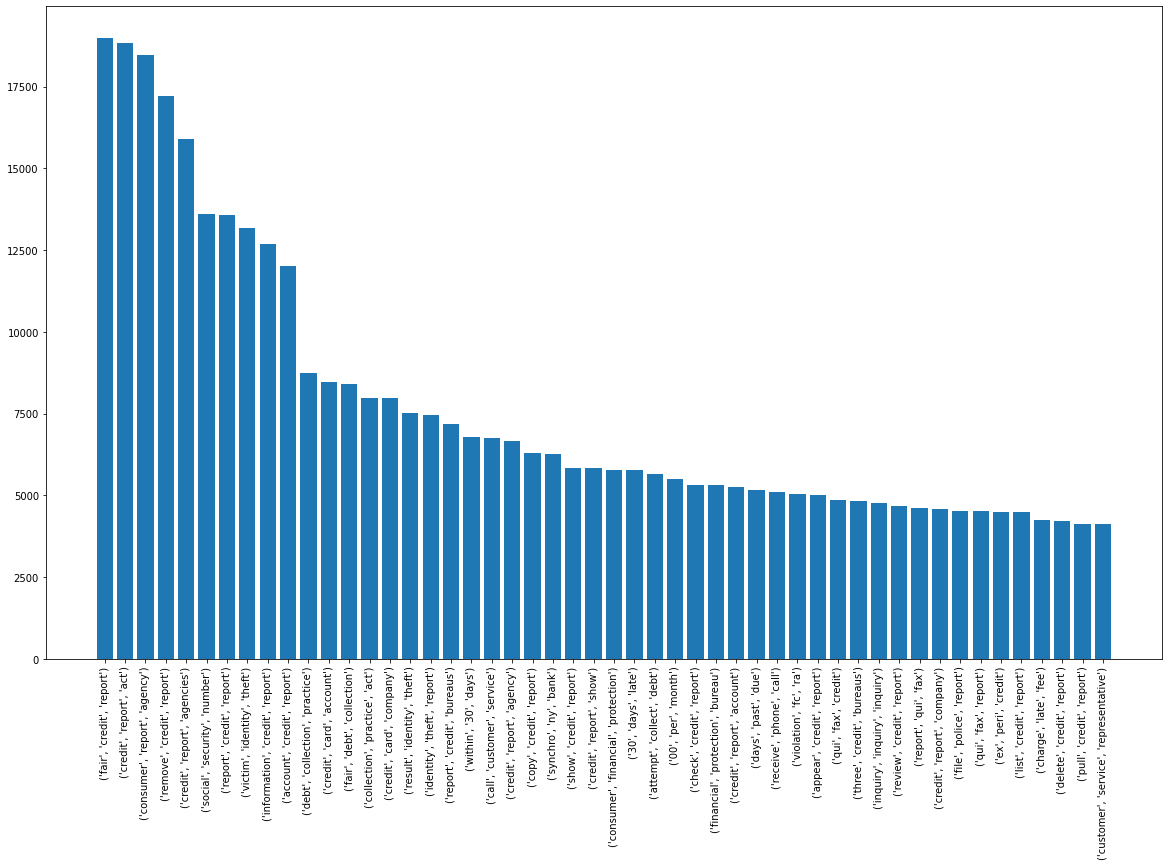

In [19]:
plt.figure(figsize= (20,12))
plt.bar(range(len(top_50_trigram)), list(top_50_trigram.values()), align='center')
plt.xticks(range(len(top_50_trigram)), list(top_50_trigram.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
#plt.figure(figsize= (20,12))
plt.xticks(rotation=90)
plt.show()